Import relevant packages here.

In [3]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
import math

Load the data and verify it is loaded correctly.
<ul>
    <li>Print it (head, tail, or specific rows, choose a sensible number of rows).</li>
    <li>Compare it to the source file.</li>
<ul>

In [4]:
data = pandas.read_csv('cf_data.csv')
print(data)

             dv         s         a
0     -0.743240   53.5427  1.242570
1     -0.557230   53.6120  1.777920
2     -0.454769   53.6541  0.544107
3     -0.525396   53.7030 -0.294755
4     -0.601285   53.7592 -0.290961
...         ...       ...       ...
73903  5.198740  116.1390 -0.795081
73904  5.104280  115.6270 -0.314263
73905  5.137640  115.1180  0.232283
73906  5.153480  114.5990  0.262078
73907  5.258680  113.1120 -0.612440

[73908 rows x 3 columns]


In the ensuing, you will use <code>numpy</code>.

Lets create a grid for the values to plot. But first create <b>two arrays named <code>dv</code> and <code>s</code></b> using <code>numpy.linspace</code> that hold the grid values at the relevant indices in their respective dimension of the grid.

Create a <b>grid named <code>a</code></b> with zeros using <code>numpy.zeros</code> in to which calculated acceleration values can be stored.<br>
<br>
Let the grid span:<br>
<ul>
    <li>Speed difference <code>dv</code> [m/s]
        <ul>
            <li>From -10 till 10</li>
            <li>With 41 evenly spaced values</li>
        </ul>
    </li>
    <li>Headway <code>s</code> [m]
        <ul>
            <li>From 0 till 200</li>
            <li>With 21 evenly spaced values</li>
        </ul>
    </li>
</ul>

In [5]:
dv = np.linspace(-10, 10, 41)
s = np.linspace(0, 200, 21)
a = np.zeros((len(s), len(dv)))

Create from the imported data 3 separate <code>numpy</code> arrays for each column <code>dv</code>, <code>s</code> and <code>a</code>. (We do this for speed reasons later.)
<ul>
    <li>Make sure to name them differently from the arrays that belong to the grid as above.</li>
    <li>You can access the data of each column in a <code>DataFrame</code> using <code>data.xxx</code> where <code>xxx</code> is the column name (not as a string).</li>
    <li>Use the method <code>to_numpy()</code> to convert a column to a <code>numpy</code> array.</li>
</ul>

In [6]:
DV = data.dv.to_numpy()
S = data.s.to_numpy()
A = data.a.to_numpy()

Create an algorithm that calculates all the acceleration values and stores them in the grid. The algorithm is described visually in the last part of last Mondays' lecture. At each grid point, it calculates a weighted mean of all measurements. The weights are given by an exponential function, based on the 'distance' between the grid point, and the measurement values of <code>dv</code> and <code>s</code>. To get you started, how many <code>for</code>-loops do you need?<br>
<br>
For this you will need <code>math</code>.<br>
Use an <i>upsilon</i> of 1.5m/s and a <i>sigma</i> of 30m.<br>
<br>
<b>Warning:</b> This calculation may take some time. So:
<ul>
    <li>Print a line for each iteration of the outer-most <code>for</code>-loop that shows you the progress.</li>
    <li>Test you code by running it only on the first 50 measurements of the data.</li>
</ul>

In [10]:
upsilon = 1.5
sigma = 30

for i in range(len(s)):
    print('At line %i of %i (%.2f%%)' % (i, len(s)-1, 100 * i / len(s)))
    for j in range(len(dv)):
        sumWA = 0
        sumW = 0
        for k in range(len(A)):
            w = math.exp(-abs(DV[k]-dv[j])/upsilon - abs(S[k]-s[i])/sigma)
            sumWA += w * A[k]
            sumW += w
        a[i][j] = sumWA / sumW

At line 0 of 20 (0.00%)
At line 1 of 20 (4.76%)
At line 2 of 20 (9.52%)
At line 3 of 20 (14.29%)
At line 4 of 20 (19.05%)
At line 5 of 20 (23.81%)
At line 6 of 20 (28.57%)
At line 7 of 20 (33.33%)
At line 8 of 20 (38.10%)
At line 9 of 20 (42.86%)
At line 10 of 20 (47.62%)
At line 11 of 20 (52.38%)
At line 12 of 20 (57.14%)
At line 13 of 20 (61.90%)
At line 14 of 20 (66.67%)
At line 15 of 20 (71.43%)
At line 16 of 20 (76.19%)
At line 17 of 20 (80.95%)
At line 18 of 20 (85.71%)
At line 19 of 20 (90.48%)
At line 20 of 20 (95.24%)


The following code will plot the data for you. Does it make sense when considering:
<ul>
    <li>Negative (slower than leader) and positive (faster than leader) speed differences?</li>
    <li>Small and large headways?</li>
</ul>

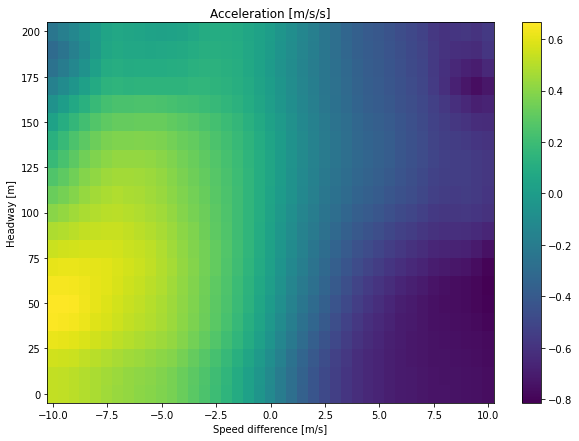

In [9]:
X, Y = np.meshgrid(dv, s)
axs = plt.axes()
p = axs.pcolor(X, Y, a, shading='nearest')
axs.set_title('Acceleration [m/s/s]')
axs.set_xlabel('Speed difference [m/s]')
axs.set_ylabel('Headway [m]')
axs.figure.colorbar(p);
axs.figure.set_size_inches(10, 7)